## Problem 3: Multiclass class classification with SVM

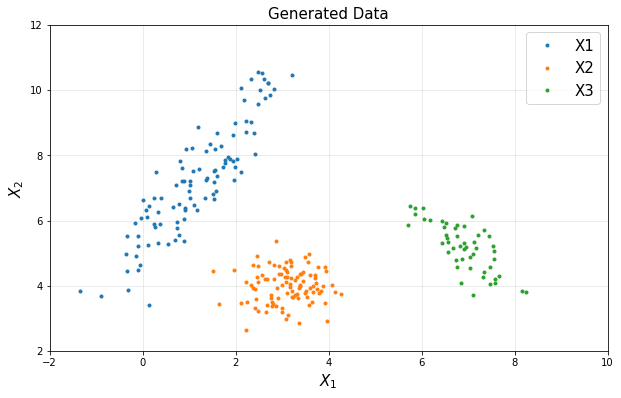

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## generate three simulated clusters

mu1 = np.array([1, 7])
SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)

mu2 = np.array([3, 4])
SIGMA2 = 0.3*np.array([[1, 0],
                       [0, 1]])
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)

mu3 = np.array([7, 5])
SIGMA3 = 0.3*np.array([[1, -1],
                       [-1, 2]])
X3 = np.random.multivariate_normal(mu3, SIGMA3, 50)

plt.figure(figsize=(10, 6))
plt.title('Generated Data', fontsize=15)
plt.plot(X1[:,0], X1[:,1], '.',label='X1')
plt.plot(X2[:,0], X2[:,1], '.',label='X2')
plt.plot(X3[:,0], X3[:,1], '.',label='X3')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
plt.legend(fontsize=15)
plt.show()

In [2]:
#Classifier for X1 and X2
import cvxpy as cvx

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

w0_1 = cvx.Variable([1,1])
w1_1 = cvx.Variable([2,1])

obj = cvx.Minimize(1)
const = [w0_1 + X1*w1_1 >= 1, w0_1 + X2*w1_1 <= -1]
prob = cvx.Problem(obj, const).solve()

w0_1 = w0_1.value
w1_1 = w1_1.value

In [3]:
#Classifier for X2 and X3
X2 = np.asmatrix(X2)
X3 = np.asmatrix(X3)

w0_2 = cvx.Variable([1,1])
w1_2 = cvx.Variable([2,1])
obj = cvx.Minimize(1)
const = [w0_2 + X2*w1_2 >= 1, w0_2 + X3*w1_2 <= -1]
prob = cvx.Problem(obj, const).solve()

w0_2 = w0_2.value
w1_2 = w1_2.value

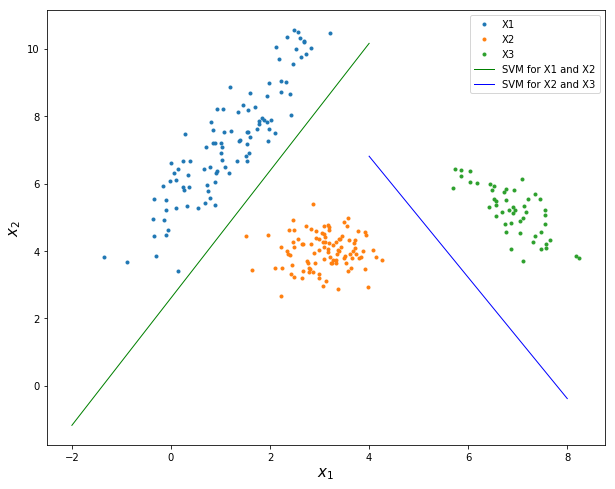

In [4]:
xp_1 = np.linspace(-2,4,100).reshape(-1,1)
yp_1 = - w1_1[0,0]/w1_1[1,0]*xp_1 - w0_1/w1_1[1,0]

xp_2 = np.linspace(4,8,100).reshape(-1,1)
yp_2 = - w1_2[0,0]/w1_2[1,0]*xp_2 - w0_2/w1_2[1,0]

plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], '.',label='X1')
plt.plot(X2[:,0], X2[:,1], '.',label='X2')
plt.plot(X3[:,0], X3[:,1], '.',label='X3')
plt.plot(xp_1, yp_1, 'g', linewidth = 1, label = 'SVM for X1 and X2')
plt.plot(xp_2, yp_2, 'b', linewidth = 1, label = 'SVM for X2 and X3')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1)
plt.show()

## Problem 4: Multiclass classification with logistic regression

In [5]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(solver='lbfgs')
x_1 = np.vstack([X1,X2])
x_2 = np.vstack([X2,X3])
y_1 = np.vstack([np.ones([100,1]), -np.ones([100,1])])
y_2 = np.vstack([np.ones([100,1]), -np.ones([50,1])])

clf.fit(x_1,np.ravel(y_1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
w0_1 = clf.intercept_[0]
w1_1 = clf.coef_[0,0]
w2_1 = clf.coef_[0,1]

clf.fit(x_2,np.ravel(y_2))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
w0_2 = clf.intercept_[0]
w1_2 = clf.coef_[0,0]
w2_2 = clf.coef_[0,1]

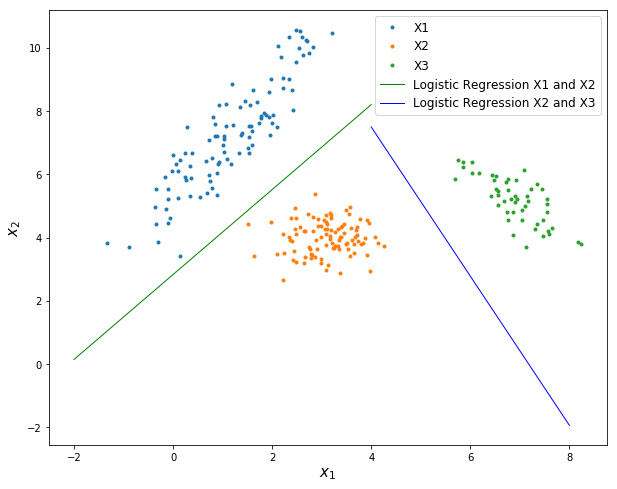

In [8]:
xp_1 = np.linspace(-2,4,100).reshape(-1,1)
yp_1 = - w1_1/w2_1*xp_1 - w0_1/w2_1

xp_2 = np.linspace(4,8,100).reshape(-1,1)
yp_2 = - w1_2/w2_2*xp_2 - w0_2/w2_2

plt.figure(figsize = (10,8))
plt.plot(X1[:,0], X1[:,1], '.',label='X1')
plt.plot(X2[:,0], X2[:,1], '.',label='X2')
plt.plot(X3[:,0], X3[:,1], '.',label='X3')
plt.plot(xp_1, yp_1, 'g', linewidth = 1, label = 'Logistic Regression X1 and X2')
plt.plot(xp_2, yp_2, 'b', linewidth = 1, label = 'Logistic Regression X2 and X3')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()